**Date: 2021-02-20**

**Authors: Asifat Haruna Olawale**

**email: olawaleasifat@gmail.com**

**Copyright © 2022 Asifat Haruna. All rights reserved**

<img src='./graphics/Corona_virus.jpg'>

<center><h1>SPATIAL ANALYSIS OF COVID-19 CASES IN LONDON </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***



**Instruction on how to install R-kernel in Jupyter Notebook**

* First, make sure you have R installed on your computer. You can download R from the official <a href="https://cran.r-project.org/"> website </a> and install it following the instructions for your operating system.

 * Install IRkernel: Open R in your terminal or R console and run the following command to install the IRkernel package: install.packages('IRkernel')
       
 * Register R-kernel: To register R-kernel with Jupyter Notebook, run the following command in your R console: IRkernel::installspec()
 


<div class="alert alert-block alert-info">
<b>Tip:</b> A good resource on how to install r-kernel can be found <a href="https://richpauloo.github.io/2018-05-16-Installing-the-R-kernel-in-Jupyter-Lab/">>>> Here! </a>
</div>
 
 


# Table of contents
* [1. Introduction](#1.-Introduction)

* [2. Short description of used pacakages](#2.Short-description-of-used-pacakages)
    * [2.1 Installing and importing R packages](#2.1-Installing-and-importing-R-packages)
 
* [3. Data description](#3-Data-description)
    * [3.1 Data exploration](#3.1-Data-exploration)
    * [3.2 Data cleaning](#3.2-Data-cleaning)
    * [3.3 Dataset merge](#3.3-Dataset-merge)
    * [3.4 Correlation test with covariate variables](#3.4-Correlation-test-with-covariate-variables)
    
* [4. Assessment metric](#4.Assessment-metric)
    * [4.1 Spatial autocorrelation](#4.1-Spatial-autocorrelation)

* [5. Cartogram (visualiaztion)](#5.-Cartogram)
    * [5.1 Timeseries plot](#5.1-Time-series-plot)
   

# 1. Introduction
 [Go back to the "Table of contents"](#Table-of-contents)

COVID-19, also known as coronavirus, is an infectious disease caused by the severe acute respiratory syndrome (SARS-CoV-2) virus.The virus was reportedly discovered on December 31, 2019, and has since evolved into a global pandemic.  The virus is highly contagious and primarily transmitted through close contact and exposure to infectious fluids.COVID-19 has had a profound impact on public health, economies, and daily life across the globe, prompting widespread efforts to control its spread through vaccination, social distancing, mask-wearing, and other preventive measures.

In this analysis,we will focus on analyzing and mapping area-based data, which can manifest in various forms, including natural boundaries like forest edges, or artificial ones such as countries, states, boroughs, and regular grid cells (O’Sullivan and Unwin, 2010).
* Our main objective is to visualize and assess the spatial pattern of observed covid-19 cases within Greater London.


# 2. Short description of used pacakages
 [Go back to the "Table of contents"](#Table-of-contents)


**rgdal**:
The "rgdal" package is an R interface to the GDAL (Geospatial Data Abstraction Library) providing access to a wide range of geospatial data formats and functionalities. It enables R users to read, write, and manipulate spatial data, including vector and raster datasets. This package is essential for working with geographic information system (GIS) data in R and allows for efficient spatial data processing and analysis.

**cartogram**:
The "cartogram" package is used for creating and visualizing cartograms in R. A cartogram is a map in which the size of regions or polygons is distorted to represent a specific variable's value instead of the actual geographic area. It helps visualize data in a spatial context while ensuring that each region's size corresponds to the variable of interest, making it useful for displaying population, economic, or other spatially-distributed data.

**rgeos**:
The "rgeos" package provides R bindings to GEOS (Geometry Engine - Open Source), a library for spatial geometry operations. It offers various geometric operations and functions for spatial data processing, including buffering, intersection, union, and more. The package is particularly useful for spatial data analysis and processing, as it enhances R's capabilities to perform geometric operations on spatial objects.

**spdep**:
The "spdep" package stands for Spatial Dependence and is designed for spatial econometrics and spatial statistics. It provides tools to analyze spatial autocorrelation and spatial dependence in data, allowing users to detect patterns and relationships in spatially-referenced datasets. The package offers functions to calculate spatial weights matrices, perform spatial regression models, and conduct various spatial statistical tests.


**maptools**:
The "maptools" package offers a collection of tools for reading and manipulating geographic and spatial data in R. It supports reading and writing spatial data in various formats, such as shapefiles and other common GIS formats. Additionally, "maptools" provides functions to plot spatial objects, conduct spatial data transformations, and perform various spatial data manipulations and analyses. It is widely used for working with geographic data in R and is an essential component of many spatial analysis workflows.


**RColorBrewer**:
This package is used to create color palettes for data visualization. It offers a range of color schemes that can be useful for producing attractive and informative maps and plots.

**magick**: 
magick is an image-processing package that enables reading, writing, and manipulation of images. It provides a wide range of functions for image transformations and is commonly used in image-related tasks.


**corrplot**:
A powerful tool for visualizing correlation matrices in a clear and informative manner. I

<div class="alert alert-block alert-warning">
Please note that the proper functioning of the "rgdal" library within the R kernel of Jupyter depends on the operating system the Jupyter environment is running on, and it requires all necessary dependencies to be installed. To ensure a seamless operation, it is essential to install the required dependencies of "rgdal." This can be achieved by installing "rgdal" within the environment, such as a conda environment, using the following command: conda install -c conda-forge r-rgdal.

Apart from rgdal other required dependecies are :
* conda install -c conda-forge r-sp
* conda install -c conda-forge r-rgeos
* conda install -c conda-forge r-maptools
* conda install -c conda-forge r-spdep
</div>

# 2.1 Installing and importing R packages
 [Go back to the "Table of contents"](#Table-of-contents)

In [ ]:
#automatic install of packages if they are not installed already

#rgdal,maptools, rgeos
list.of.packages <-c("rgdal","cartogram", "rgeos","spdep","maptools","RColorBrewer", "magick","corrplot")

#verify the list of installed packages 
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]

#install missing packages 
if(length(new.packages) > 0){install.packages(new.packages, dep=TRUE,repos = "http://cran.us.r-project.org")}

## load dependencies
for (i in list.of.packages){suppressPackageStartupMessages(library(i,character.only = TRUE))}

# 3. Data description
 [Go back to the "Table of contents"](#Table-of-contents)

The data used comprises open-source COVID-19 daily new cases (NC) and total cases (TC) datasets, which were made available by Public Health England (PHE). Additionally, auxiliary data, such as population density and smoking indicators, were included to complement the analysis. These supplementary datasets were published by the Greater London Authority (GLA) and the London Department of Health, respectively. The combination of COVID-19 data and additional indicators allows for a comprehensive examination of the pandemic's impact and associated factors in the Greater London area.

Please click on the links below for more information and to download the respective data.

**Data source**
* Mian data:
     * Daily Covid19 cases (boroughs) in London: https://data.london.gov.uk/dataset/coronavirus--covid-19--cases
     * Shapefile: London_Borough https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london
* Auxiliary data:
     *  Population https://data.gov.uk/dataset/a76f46f9-c10b-4fe7-82f6-aa928471fcd1/land-area-and-population-density-ward-and-borough
     *  Health data: smoking indicators for London: https://data.london.gov.uk/dataset/smoking-indicators-borough (Numbers of adults smoking by borough).

# 3.1 Data exploration 
 [Go back to the "Table of contents"](#Table-of-contents)

In [ ]:
###increase the plot size
options(repr.plot.width = 15, repr.plot.height = 10)

#Import all the data 
covidcases=read.csv("./data/phe_cases_london_boroughs.csv")

#read the vector file
londonref <-readOGR("./data/vector/London_Borough_Excluding_MHW.shp")

#Import Auxiliary data
pop <- read.csv("./data/housing-density-borough.csv")

#subset the poplation record for 2019
pop=pop[pop$Year=="2019",]

smoker <-read.csv("./data/smoking_status_2017.csv")


In [6]:
#view dataset 
#summary(londonref)
print('Covid 19 cases data')
head(covidcases)
print('Population dataset')
head(pop)
print('Smoking status dataset')
head(smoker)


[1] "Covid 19 cases data"


X                    area_code date      new_cases total_cases
1 Barking and Dagenham E09000002 2_11_2020 0         0          
2 Barnet               E09000003 2_11_2020 0         0          
3 Bexley               E09000004 2_11_2020 0         0          
4 Brent                E09000005 2_11_2020 0         0          
5 Bromley              E09000006 2_11_2020 0         0          
6 Camden               E09000007 2_11_2020 0         0

[1] "Population dataset"


Code      Name                 Year Source                     Population
21  E09000001 City of London       2019 GLA Population Projections   7953    
73  E09000002 Barking and Dagenham 2019 GLA Population Projections 214858    
125 E09000003 Barnet               2019 GLA Population Projections 402363    
177 E09000004 Bexley               2019 GLA Population Projections 252885    
229 E09000005 Brent                2019 GLA Population Projections 340710    
281 E09000006 Bromley              2019 GLA Population Projections 334292    
    Inland_Area._Hectares Total_Area_Hectares Population_per_hectare
21    290.4                 314.9             27.4                  
73   3610.8                3779.9             59.5                  
125  8674.8                8674.8             46.4                  
177  6058.1                6428.6             41.7                  
229  4323.3                4323.3             78.8                  
281 15013.5               15013.5             22.3                  
    Square_Kilometres Population_per_square_kilometre
21    2.9             2738.7                         
73   36.1             5950.5                         
125  86.7             4638.3                         
177  60.6             4174.4                         
229  43.2             7880.9                         
281 150.1             2226.6

[1] "Smoking status dataset"


Code      Area.name            current.cigarette.smoker ex.smoker
1 E09000002 Barking and Dagenham 26000                    28000    
2 E09000003 Barnet               49000                    50000    
3 E09000004 Bexley               22000                    48000    
4 E09000005 Brent                36000                    35000    
5 E09000006 Bromley              34000                    62000    
6 E09000007 Camden               32000                    52000    
  never.smoked Total  Rate
1  86000       140000 19  
2 187000       286000 17  
3 117000       187000 12  
4 160000       231000 16  
5 152000       248000 14  
6 112000       196000 16

In [7]:
plot(londonref)

<div class="alert alert-block alert-info">
<b>Tip:</b> By the time the analysis was carried out, the most recent reported case was on February 16, 2021. Please update the date for a more current analysis.
</div>

In [8]:
# filter boroughs to the most recent date
covidcases=covidcases[covidcases$date=="2_16_2021",]

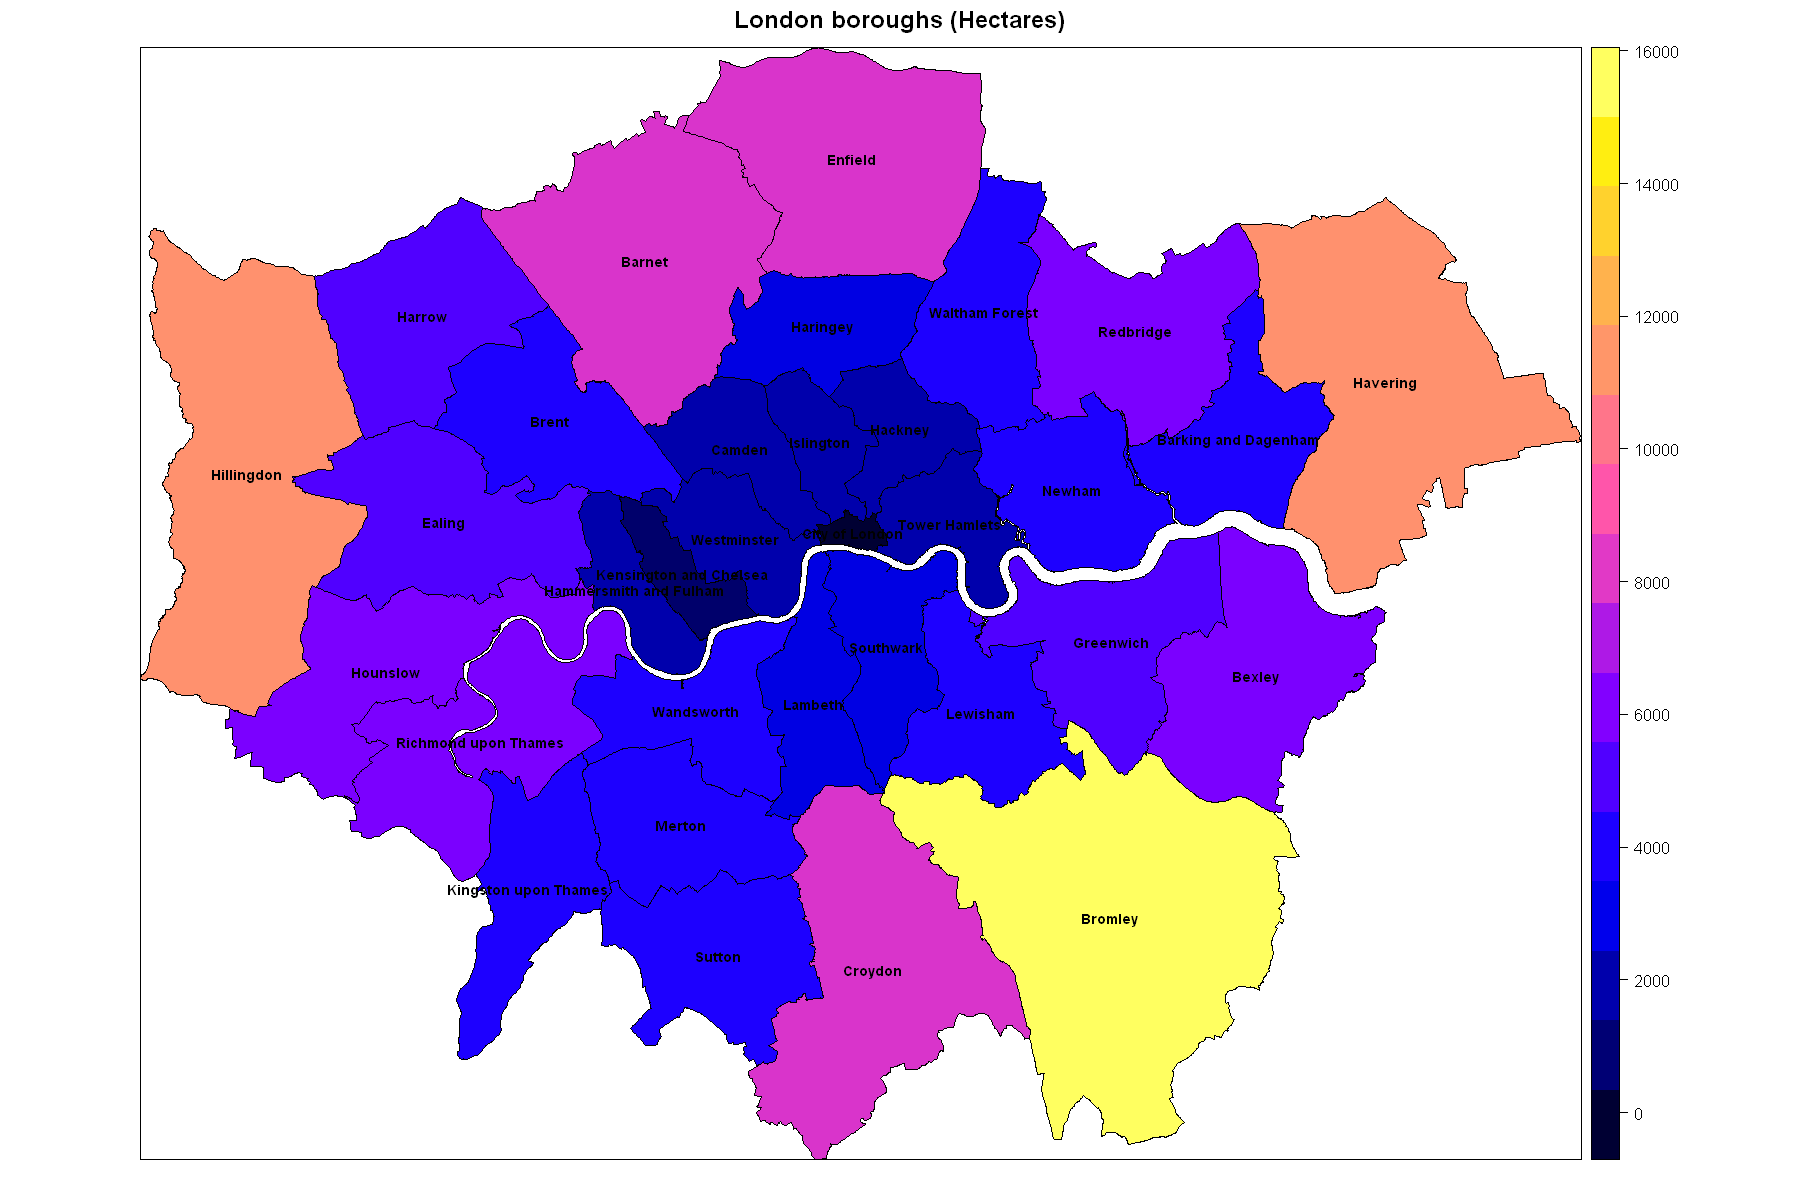

In [9]:
###################################################
#######Visualization of London borough
###################################################

#label the boroughs 
l1 = list("sp.text", coordinates(londonref), as.character(londonref@data$NAME),col="black", cex=0.7,font=2)
spplot(londonref,zcol="HECTARES",sp.layout=list(l1),main="London boroughs (Hectares)")


# 3.2 Data cleaning
 [Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-warning">
The data were collected from various sources, which may lead to variations in the labels. Additionally, different methods might have been used to record the observations, further contributing to potential discrepancies in the dataset. To ensure accurate and coherent analysis (for example spatial join), it is crucial to identify these instances of variation and standardize the dataset before proceeding with further analysis.
</div>

In [10]:
print(paste('The number of unique boroughs ID in the vector file (.shp) :', nlevels(unique(londonref$NAME))))
print(paste('The number of unique boroughs ID in the covid19 file (.csv) :',nlevels(covidcases$X)))
print(paste('The number of unique boroughs ID in the population file (.csv) :',nlevels(pop$Name)))

[1] "The number of unique boroughs ID in the vector file (.shp) : 0"
[1] "The number of unique boroughs ID in the covid19 file (.csv) : 0"
[1] "The number of unique boroughs ID in the population file (.csv) : 0"


In [11]:
tmp=unique(covidcases$X)[!is.element(unique(covidcases$X),unique(londonref$NAME))]

# it shows "Hackney and City" of London r aggregated/dissolve as a single borough in the covidcases 
print(tmp) 
tmp2=unique(pop$Name)[!is.element(unique(pop$Code),unique(londonref$GSS_CODE))]##### shows greater london , inner london and outer london are different
print(tmp2)
tmp2=is.element(unique(pop$Code),unique(londonref$GSS_CODE))

[1] "Hackney and City of London"
[1] "Greater London" "Inner London"   "Outer London"  


* Clearly the records indicates that the boroughs' IDs are not the same. This inconsistency in borough IDs can potentially influence operations such as joining spatial data with corresponding attributes. It is essential to address this issue to ensure accurate and reliable data analysis and processing.

* One noticeable discrepancy in the COVID-19 cases dataset is the aggregation of the Hackney and City of London boroughs into a single borough. This explains why we have 32 unique boroughs recorded for the COVID-19 cases dataset instead of the expected 33.

* Furthermore, in the population dataset, there are additional categories of London with distinct area code IDs, namely Greater London, Inner London, and Outer London. These special categories might  introduce complexities in data handling and analysis, as they represent specific regions with unique characteristics and demographics. It is essential to consider these distinctions when conducting spatial analyses 

In [12]:
#since  "Hackney and City" of London r aggregated in the covid cases observation, we could dissolved londonref_boroughs and pop making total 
#number of observation=32 for all dataset
con=londonref$NAME=="Hackney"|londonref$NAME=="City of London"
london_dissolve=londonref
london_dissolve@data$GSS_CODE[con]=rep(london_dissolve@data$GSS_CODE[con][1],2)
london_dissolve@data$NAME[con]=rep(london_dissolve@data$NAME[con][1],2)
london_dissolve$ID=1:length(london_dissolve@data$NAME)
london_dissolve$ID[con]=rep(london_dissolve$ID[con][1],2)
union=unionSpatialPolygons(london_dissolve,london_dissolve$ID)

# Plot the original and aggregated polygons
par(mfrow=c(1,2))
plot(londonref[con,], main='Undessolved boundary')
plot(union[union@plotOrder==15], main='Dessolved boundary')

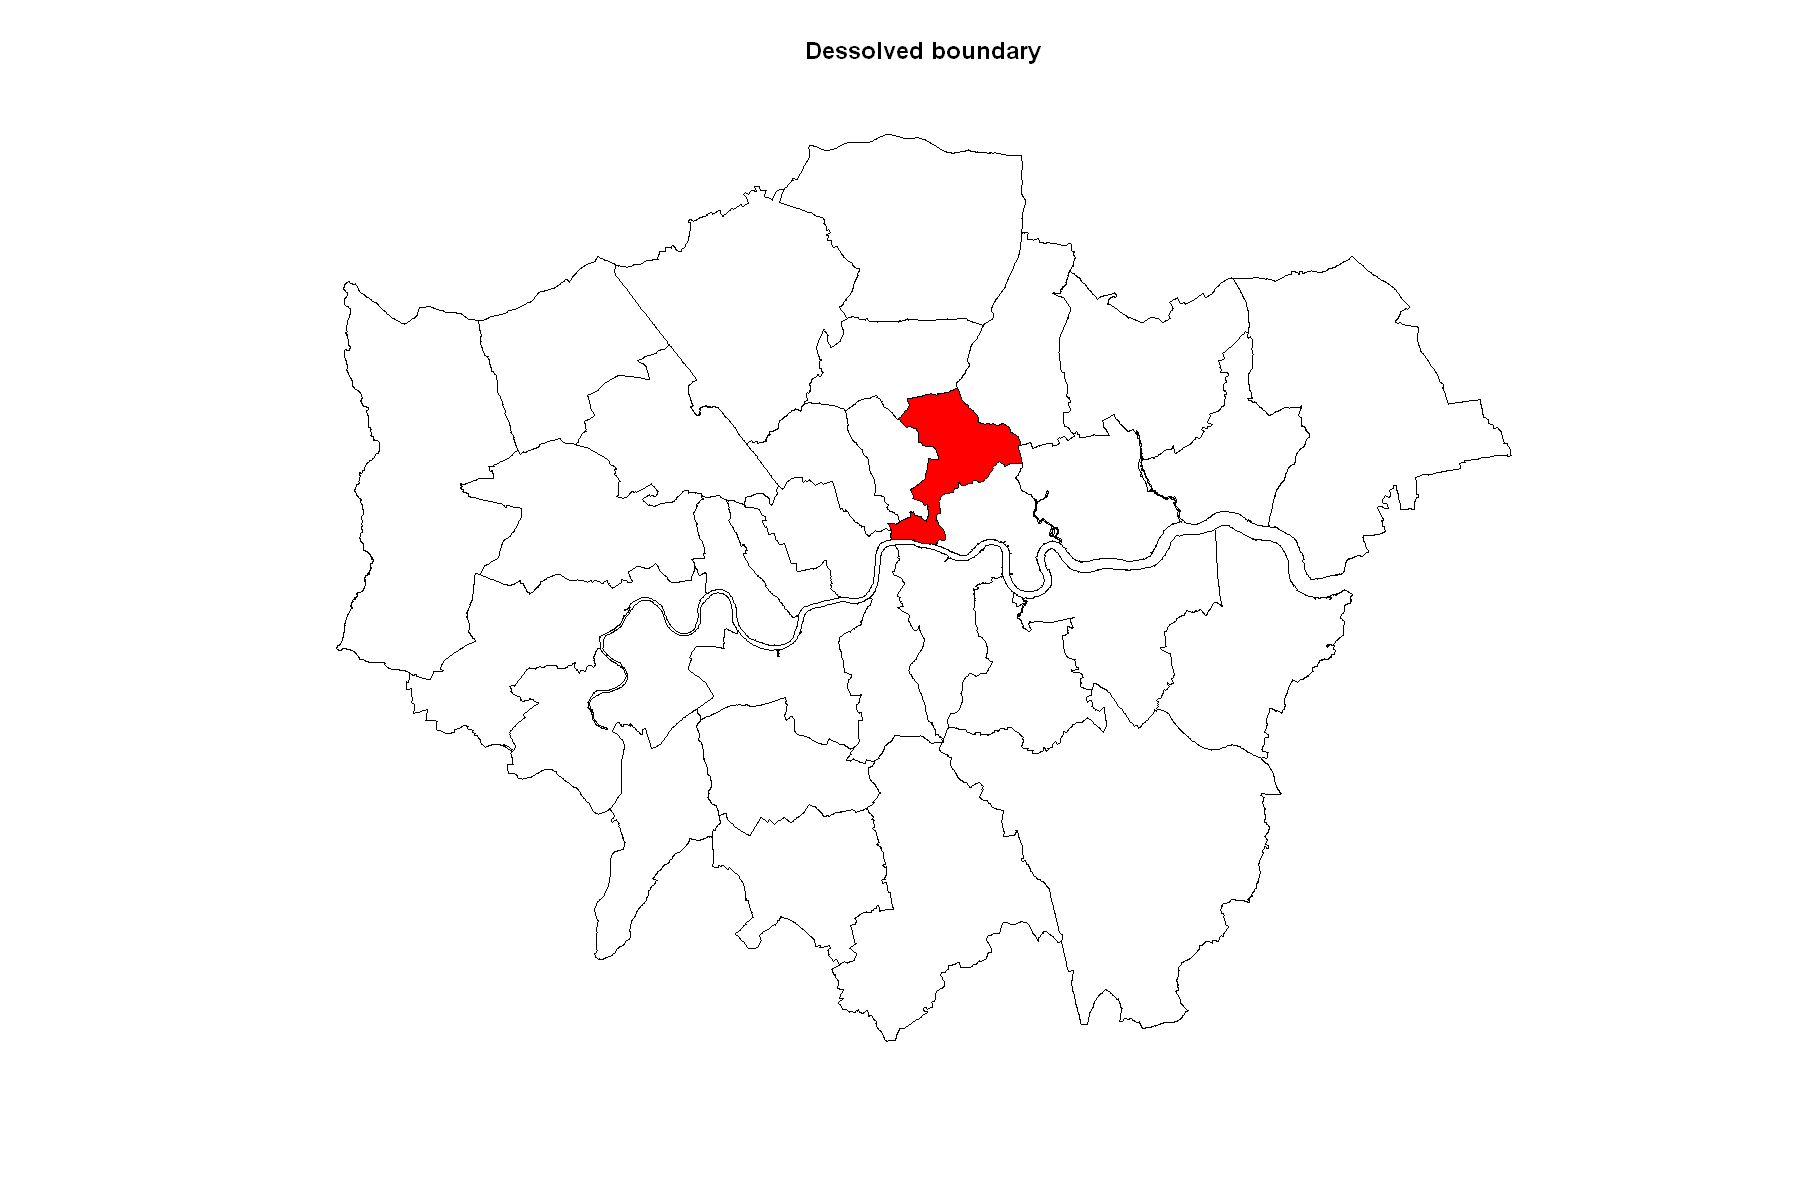

In [13]:
###aggregrate d dissolved dataframe

london_dissolve.df=as(london_dissolve,"data.frame")
londonref.aggregate=aggregate(london_dissolve.df[,3:4],list(london_dissolve.df$ID),sum)

#########################

londonref.df_merge=london_dissolve.df
londonref.df_merge=londonref.df_merge[-33,]# to remove city of london 
##### now add the newly aggregrated dataframe 
londonref.df_merge$HECTARES=londonref.aggregate$HECTARES
londonref.df_merge$HECTARES=londonref.aggregate$NONLD_AREA

######convert the dataframe to a spatilploygondataframe 

#row.names(union)
#row.names(londonref.df_merge)

row.names(londonref.df_merge)= as.character(1:32)
londonref.reshape=SpatialPolygonsDataFrame(union,londonref.df_merge,match.ID = T)

plot(londonref.reshape, main="Dessolved boundary")

plot(union[union@plotOrder==15], add=TRUE,col = 'red')
londonref=londonref.reshape


In [14]:
#######data cleaning for the population data set
pop=pop[tmp2,]
## aggregrate the hackney and city of London pop data
pop$ID=1:length(unique(pop$Code))
head(pop)
#london_dissolve.df$GSS_CODE[con]
con2=pop$Code=="E09000012"|pop$Code=="E09000001"
pop$Name[con2]
pop.agg=pop

#since we are dissolving Hackney and city of London we may  asign just a single name to the dissolved borough.
pop.agg$Name[con2]=rep(pop.agg$Name[con2][2],2)
pop.agg$Code[con2]=rep(pop.agg$Code[con2][2],2)
pop.agg$ID[con2]=rep(pop.agg$ID[con2][2],2)

pop.num.df=pop.agg[,5:10]
pop.num.df=aggregate(pop.num.df,list(pop.agg$ID),sum)
colnames(pop.num.df)[1] ="ID"

######now merge it with the original pop data 
pop.agg=pop.agg[-1,]###to remove the duplicated column bfor merging 
pop.agg[,5:10]=pop.num.df[,-1]


Code      Name                 Year Source                     Population
21  E09000001 City of London       2019 GLA Population Projections   7953    
73  E09000002 Barking and Dagenham 2019 GLA Population Projections 214858    
125 E09000003 Barnet               2019 GLA Population Projections 402363    
177 E09000004 Bexley               2019 GLA Population Projections 252885    
229 E09000005 Brent                2019 GLA Population Projections 340710    
281 E09000006 Bromley              2019 GLA Population Projections 334292    
    Inland_Area._Hectares Total_Area_Hectares Population_per_hectare
21    290.4                 314.9             27.4                  
73   3610.8                3779.9             59.5                  
125  8674.8                8674.8             46.4                  
177  6058.1                6428.6             41.7                  
229  4323.3                4323.3             78.8                  
281 15013.5               15013.5             22.3                  
    Square_Kilometres Population_per_square_kilometre ID
21    2.9             2738.7                          1 
73   36.1             5950.5                          2 
125  86.7             4638.3                          3 
177  60.6             4174.4                          4 
229  43.2             7880.9                          5 
281 150.1             2226.6                          6

[1] "City of London" "Hackney"

# 3.3 Dataset merge
 [Go back to the "Table of contents"](#Table-of-contents)


In [15]:
# Merge datasets

london <- merge(x=londonref, y=pop.agg, by.x="GSS_CODE", by.y="Code") # Population
london <- merge(x=london, y=covidcases, by.x="GSS_CODE", by.y="area_code")# covid
london <- merge(x=london, y=smoker, by.x="GSS_CODE", by.y="Code")# smoker

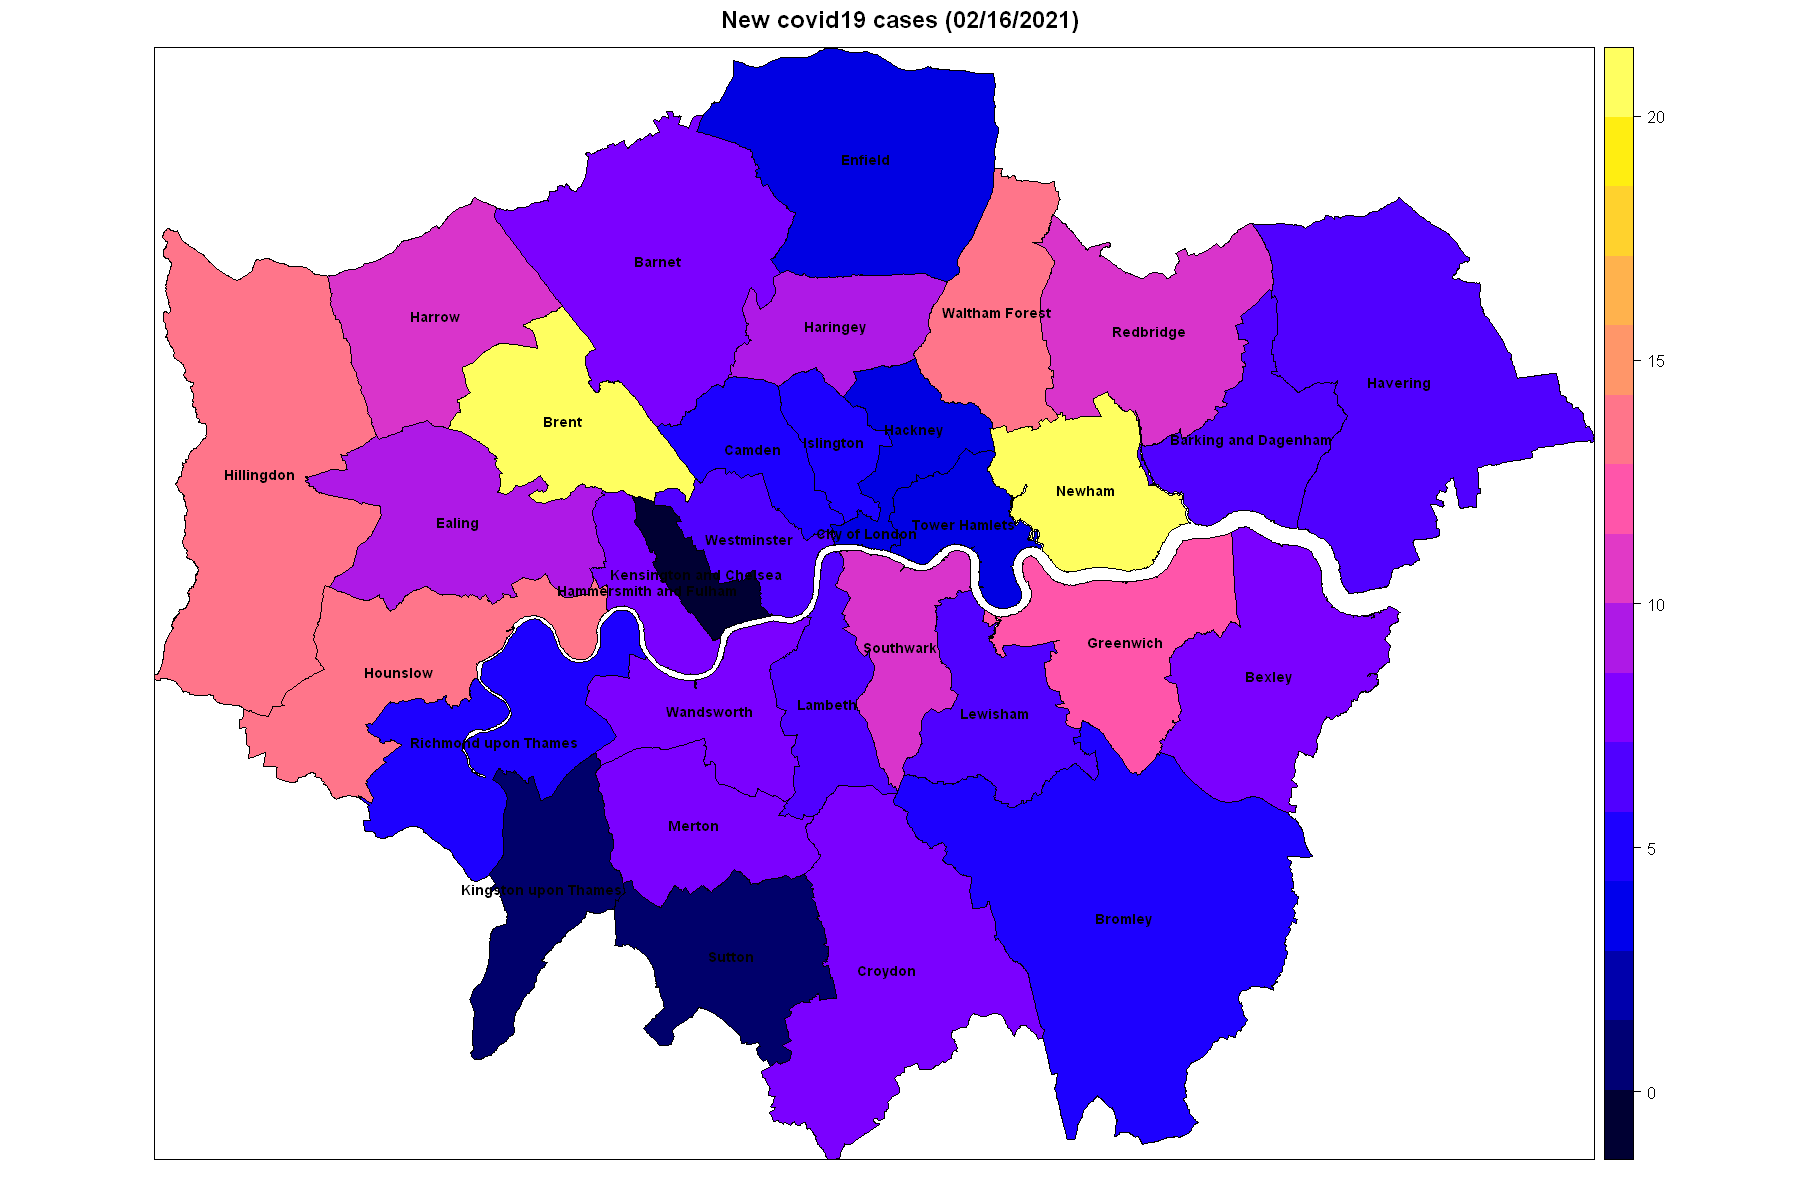

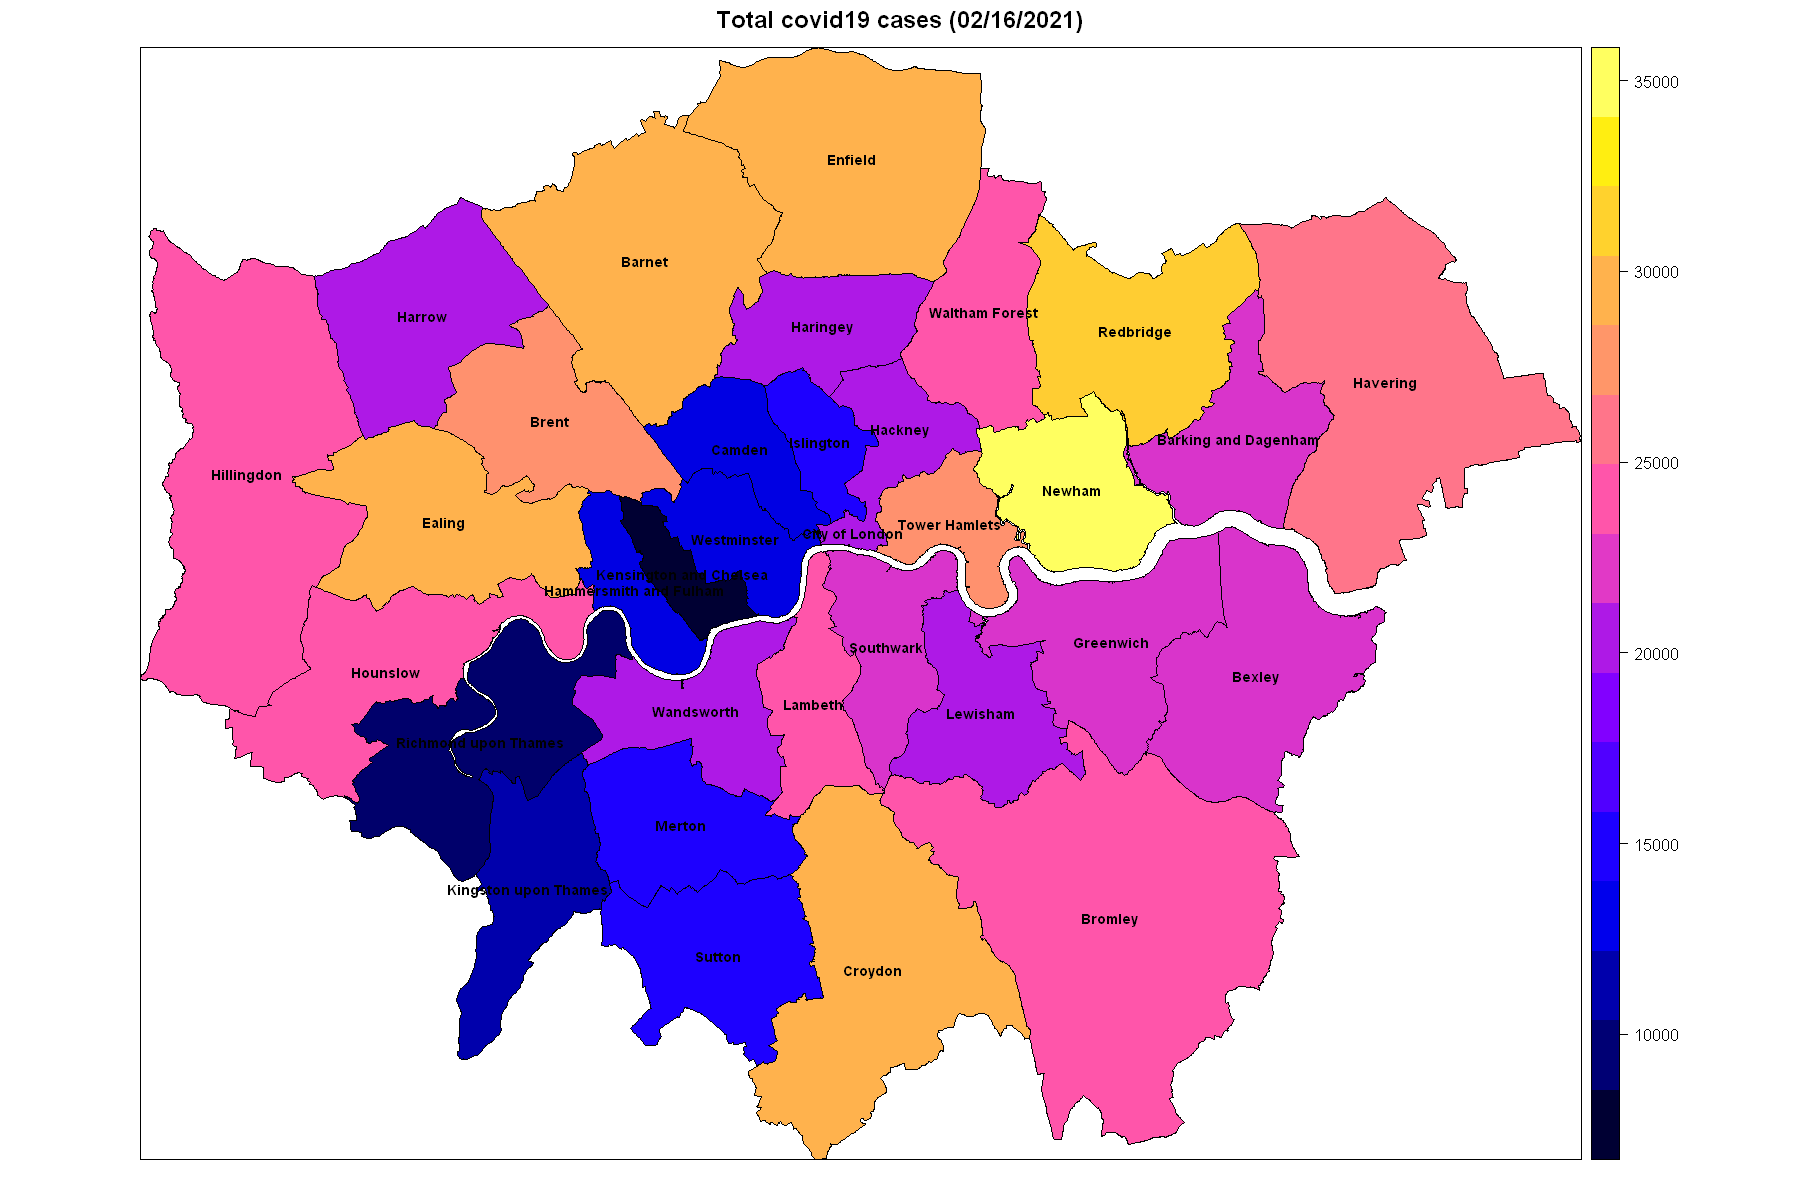

In [16]:
#Visualization of covid19 cases 
spplot(london,zcol="new_cases",sp.layout=list(l1),main="New covid19 cases (02/16/2021)")
spplot(london,zcol="total_cases",sp.layout=list(l1),main="Total covid19 cases (02/16/2021)")

**Total cases (TC):**
The figures above illustrate the spatial distribution of total (TC) COVID-19 cases observed on February 16, 2021. Notably, Newham stands out as the most affected borough, reporting over 34,000 confirmed total cases. On the other hand, Kensington and Chelsea have the lowest total cases, with a count of less than 9,000. Some neighboring boroughs, like Newham and Redbridge, Barnet and Enfield, Hounslow and Hillingdon, and Merton and Sutton, exhibit similar case counts, indicating a potential clustering effect. However, other boroughs, such as Croydon (>29,000) and Sutton (<16,000), show a considerable disparity in case numbers. Overall, the distribution of high total cases appears to be more skewed towards the northern region of Greater London, while in the southern region, Croydon (southern border) appears to have relatively higher case counts compared to other southern boroughs.

**New cases (NC):**
The figure for the new cases reveals that Newham and Brent have the highest number of reported new cases, each with a count of 20, while Kensington and Chelsea did not report any new cases during this period. These observations underscore the importance of monitoring and understanding the spatial patterns of COVID-19 cases to implement targeted public health interventions effectively.

In [17]:

london$covidfrac <- london$total_cases/london$Population
spplot(london,zcol="covidfrac",sp.layout=list(l1),main="Fraction of infected population per borough (02/16/2021)")


* Figure above  provides valuable insights into the proportion of infected people by borough, offering a different perspective from the total case (TC) map. The map reveals that the north-eastern borders of Greater London bear the brunt of the pandemic, with more than 10% of the population being affected. This highlights the severity of the situation in this region, indicating a higher concentration of COVID-19 cases.

* In contrast, the central and south-western boroughs exhibit a relatively smaller proportion of the population affected by the virus. This observation suggests that these areas may have experienced lower infection rates compared to the more heavily impacted regions. Understanding these variations in infection rates across different boroughs is crucial for designing targeted public health interventions and resource allocation to address the specific needs of each community.

# 3.4 Correlation test with covariate variables
 [Go back to the "Table of contents"](#Table-of-contents)


We aim to examine several explanatory covariates that could potentially account for the spatial variability in the total COVID-19 cases in London boroughs. These variables include smoking status and population density within each borough.

The choice to investigate the relationship of smoking status was driven by the need to determine whether smoking might increase the risk of contracting the virus, as research suggests the following impact of smoking on COVID-19:

* Weakening of Respiratory System: Smoking can damage the respiratory system, including the airways and lungs, making it easier for respiratory viruses like COVID-19 to enter the body.
* Immune System: Smoking can weaken the immune system, reducing the body's ability to fight off infections, including COVID-19.

However, it is crucial to note that research findings have not been consistent across all studies, and some have reported different results. Additionally, the impact of smoking on COVID-19 risk may depend on various individual factors, such as age, underlying health conditions, and the extent of smoking. To gain a comprehensive understanding, we will carefully analyze and interpret the data in light of these considerations.

In [18]:
#Normalize the covariates
london$smokerate<- (london$current.cigarette.smoker/london$Total)*100
london$neversmokerate <- (london$never.smoked/london$Total)*100
london$exsmokerate <- (london$ex.smoker/london$Total)*100
london$fracTotalCase <-london$total_cases/ london$Population
#london$Populationdens <- london$Population/london$HECTARES

In [19]:
pop_cor=cor.test(london$Population,london$total_cases,use = "pairwise.complete.obs", method="spearman")

smk_cor=cor.test(london$smokerate,london$total_cases,use = "pairwise.complete.obs", method="spearman")

neversmk_cor=cor.test(london$neversmokerate,london$total_cases,use = "pairwise.complete.obs", method="spearman")

covariate<- c("Population","Smoking rate","Non-smoking rate ")
correlation<-c(pop_cor$estimate,smk_cor$estimate,neversmk_cor$estimate)
p_values<-c(pop_cor$p.value,smk_cor$p.value,neversmk_cor$p.value)

# Create the dataframe
df <- data.frame(Covariate = covariate, Correlation = correlation, P_value = p_values)

# Print the dataframe
print(df)


          Covariate Correlation      P_value
1        Population  0.82258065 5.536985e-07
2      Smoking rate  0.07111437 6.980141e-01
3 Non-smoking rate   0.39259531 2.700550e-02


* The analysis reveals a significant positive correlation between the observed total number of COVID-19 cases and population. This finding suggests a strong linear relationship between these two variables.

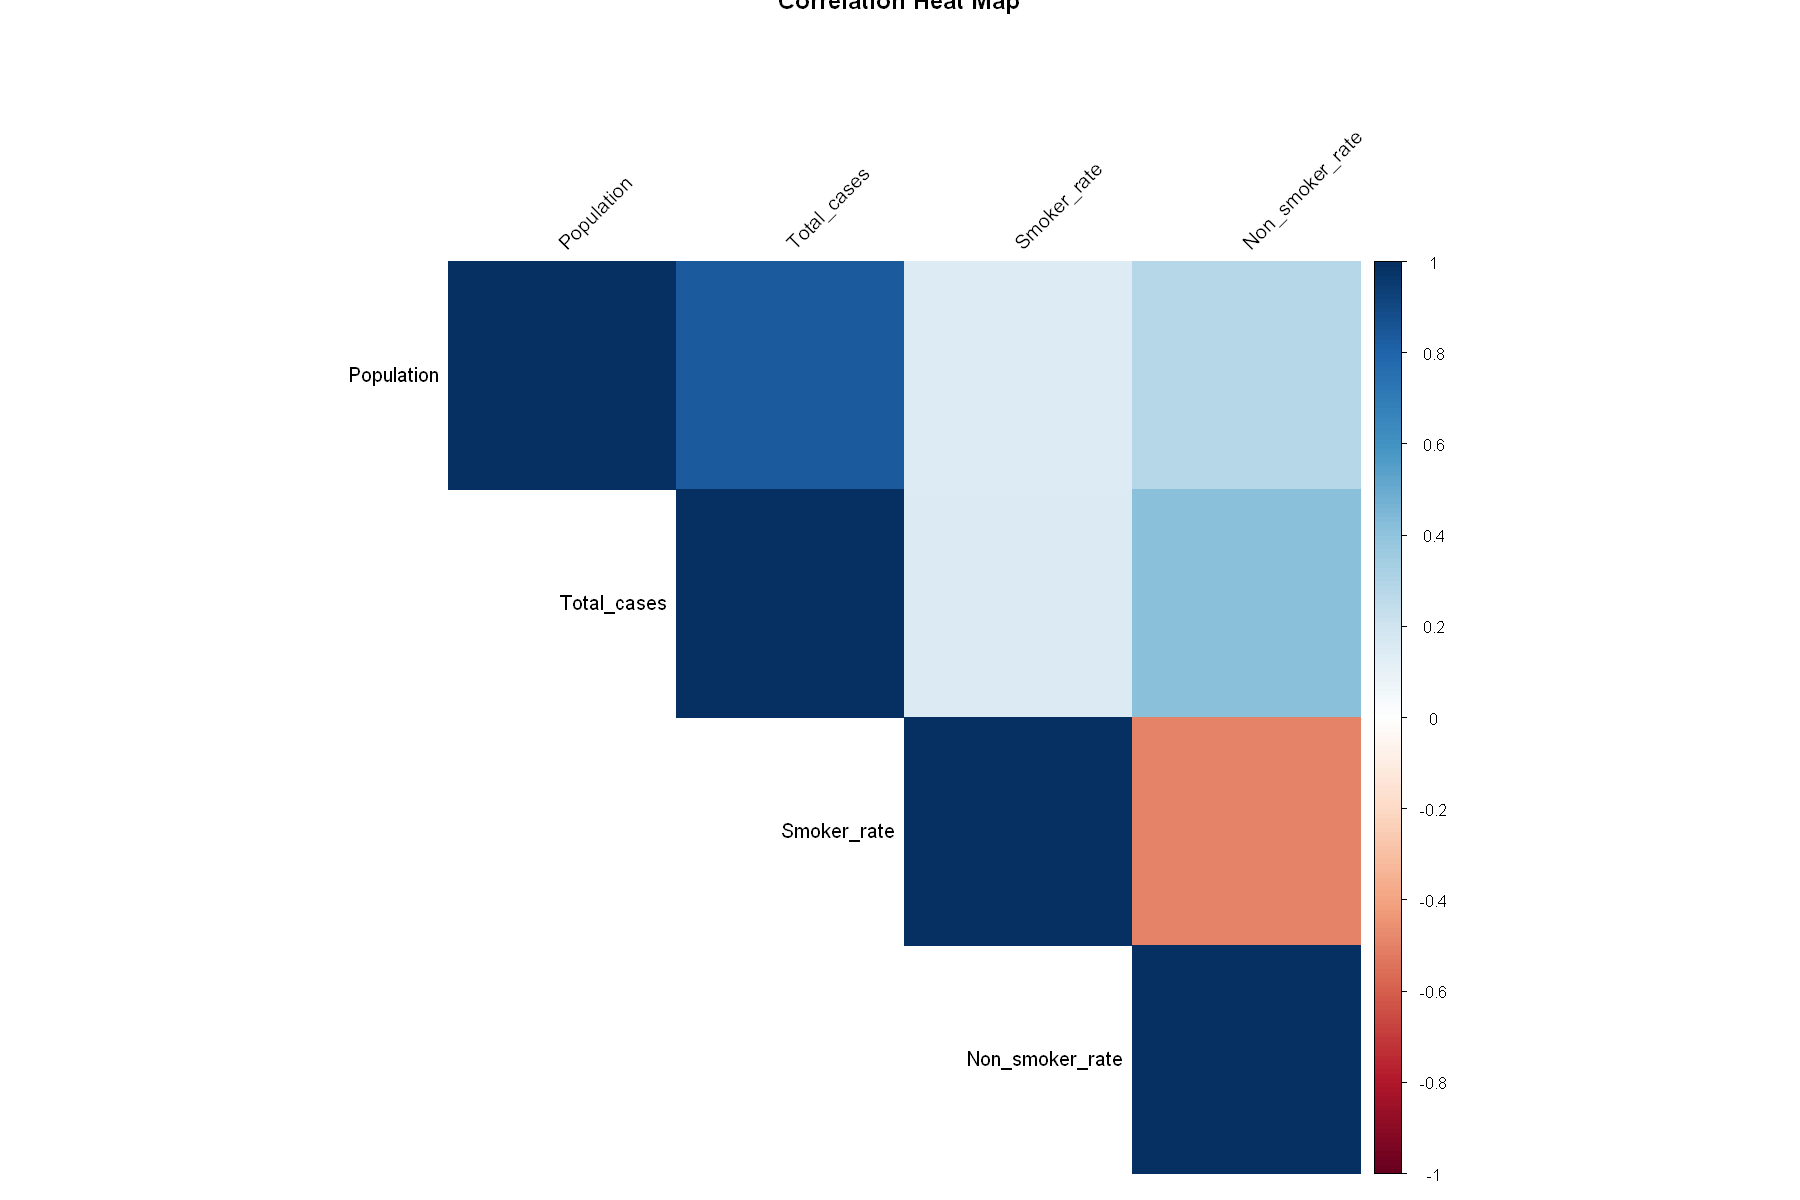

In [20]:
#Visualizazion
# Calculate the correlation matrix
cor_matrix <- cor(data.frame(Population=london$Population,Total_cases=london$total_cases,Smoker_rate=london$smokerate,Non_smoker_rate=london$neversmokerate))

# Create a heatmap using corrplot
corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45, main='Correlation Heat Map')





# 4. Assessment metric 
 [Go back to the "Table of contents"](#Table-of-contents)

Given the uneven distribution of the population within the study area, we acknowledged that the spatial distribution of the pandemic is unlikely to be entirely random, as illustrated in the popualtion map. We hypothesized that boroughs with higher population densities would exhibit higher transmission rates compared to those with lower population densities. To investigate this, we calculated the expected number of total cases for each borough, which represents the "at-risk" population. We then compared this estimation to the observed total cases. This approach is refer to as **standardized incidence ratio (SIR)**

**standardized incidence ratio (SIR)**:

It is a measure commonly used in epidemiology to assess whether the incidence of a disease in a particular population is higher or lower than what would be expected based on a comparison group.

The formula for calculating the SIR is:

SIR = (Observed number of cases) / (Expected number of cases) 

A SIR value greater than 1 indicates that the observed number of cases is higher than expected, suggesting an increased risk or incidence of the disease in the population being studied. Conversely, a SIR value less than 1 suggests a lower incidence of the disease compared to the reference population, indicating a potential protective effect.

SIR analysis is particularly valuable in public health and epidemiological studies to identify potential clusters or areas with higher or lower disease rates than expected. It helps in understanding whether certain factors, such as demographic characteristics or exposure to specific risk factors, contribute to the variations in disease incidence across different populations. By identifying areas with significantly elevated SIR values, public health officials can focus resources and interventions to address and control disease outbreaks effectively.



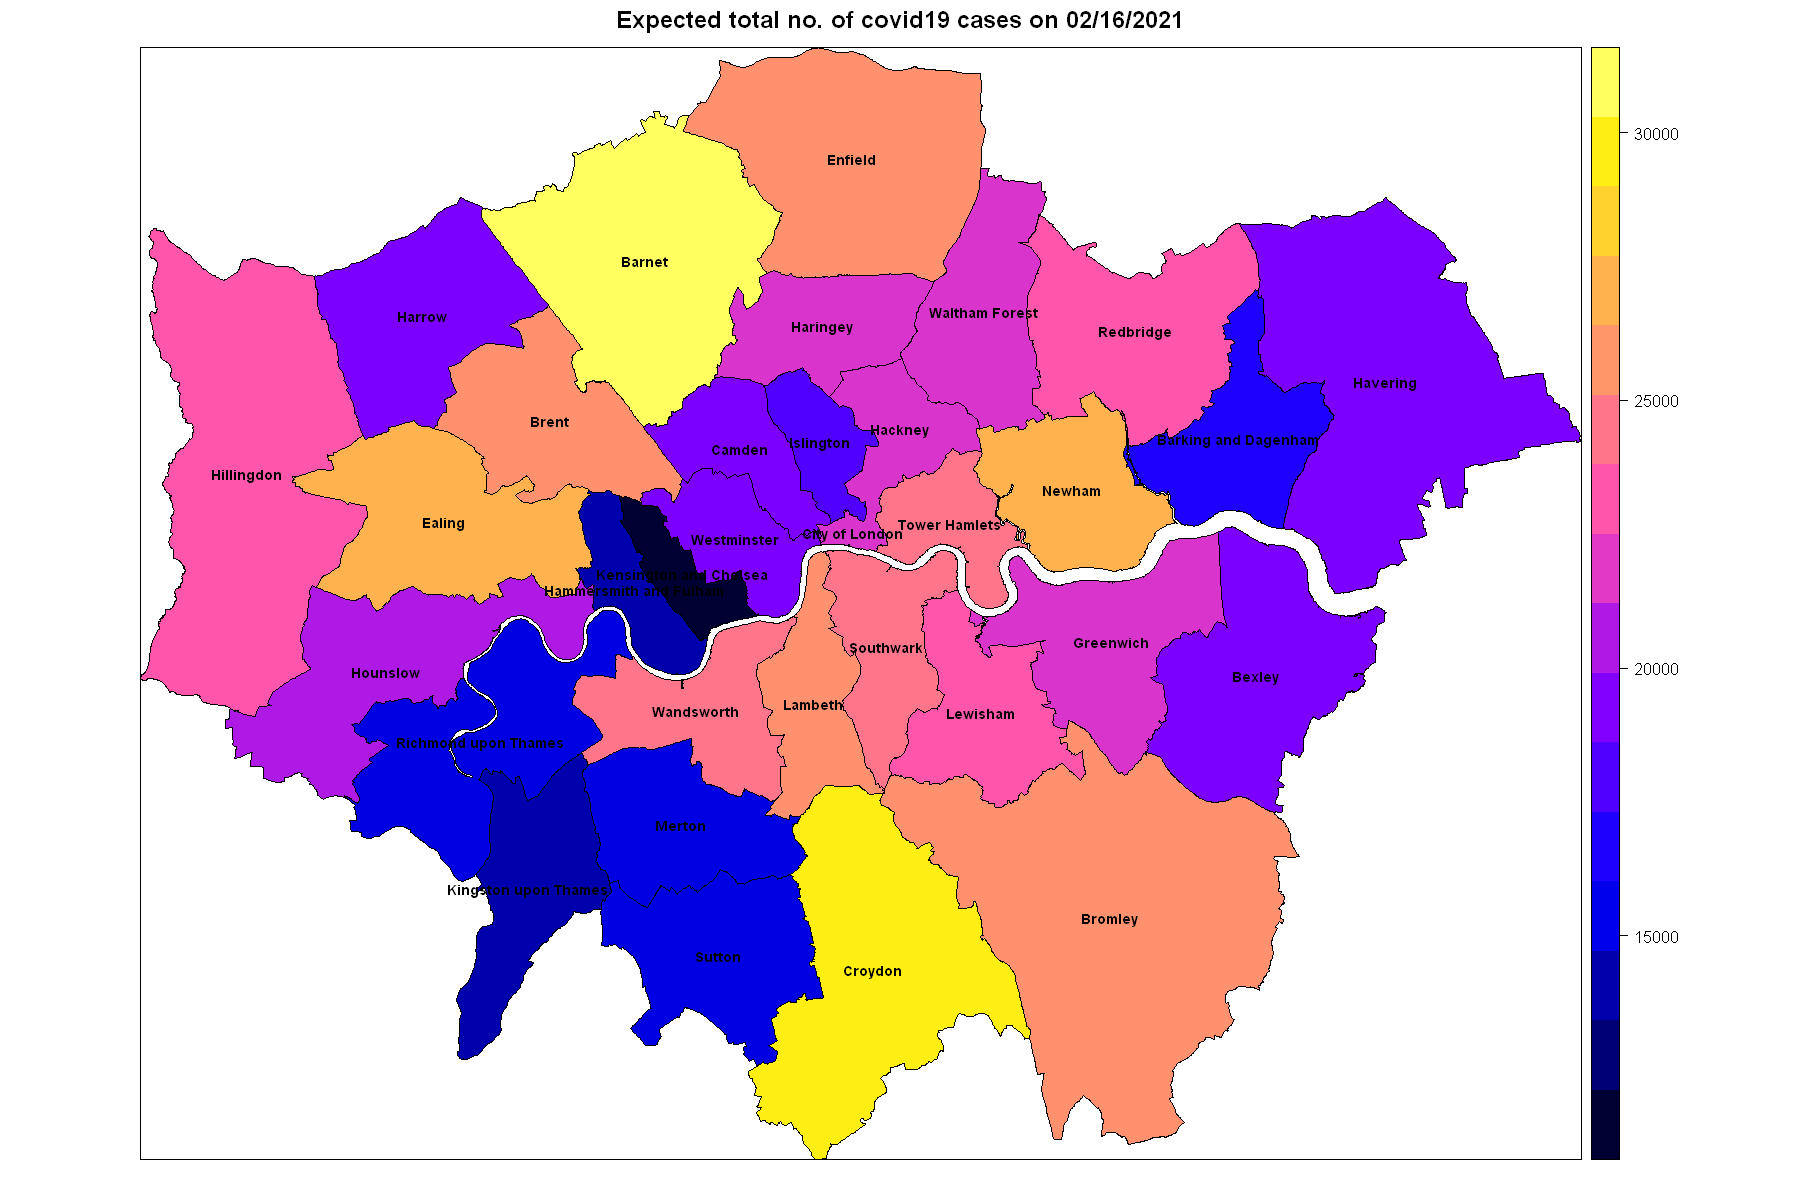

In [21]:
#Calculate the total covid19 rate 
all <- sum(london$Population)
londoncovidrate <-sum(london$total_cases)/all

# Calculate the expected number for each borough.
london$covidexp <- londoncovidrate*london$Population
spplot(london,"covidexp",sp.layout=list(l1) ,main="Expected total no. of covid19 cases on 02/16/2021")

# Calculate the ratio of observed to expected.
london$covidratio= (london$total_cases/london$covidexp)#*100
spplot(london,"covidratio",sp.layout=list(l1), main="Standardized Incidence Ratio (SIR) of Covid-19")


* The SIR map  reveals that in the north-eastern boroughs of Greater London, the number of observed total cases (TC) was more than 30% higher than the number of cases expected based on the population size. This suggests that these areas experienced a higher incidence of COVID-19 than what would be typically expected.

* Conversely, in boroughs such as Richmond upon Thames, Westminster, Camden, and Kensington and Chelsea, the observed TC was 30% lower than the number of cases expected based on the population size. This indicates that these areas had fewer COVID-19 cases than what would be anticipated in relation to their population.

* Notably, for the boroughs of Croydon and Harrow, the observed TC matched the number of cases expected based on their population size. In other words, the incidence of COVID-19 in these areas was consistent with what would be predicted for their respective populations.

* The RSI analysis helps to identify areas that deviate from the expected patterns of disease incidence, which can provide valuable insights for public health officials in understanding and responding to regional variations in COVID-19 transmission. Most importantly,this analysis aids in identifying potential hotspots, and can facilitate  resource allocation to curb the transmission of COVID-19 effectively.

# 4.1 Spatial autocorrelation
 [Go back to the "Table of contents"](#Table-of-contents)

* In order to check for any spatial autocorrelation in the SIR measures across the boroughs, we will introduce a spatial term. This term builds a neighbor's list based on regions with contiguous boundaries, meaning they share one or more boundary points.

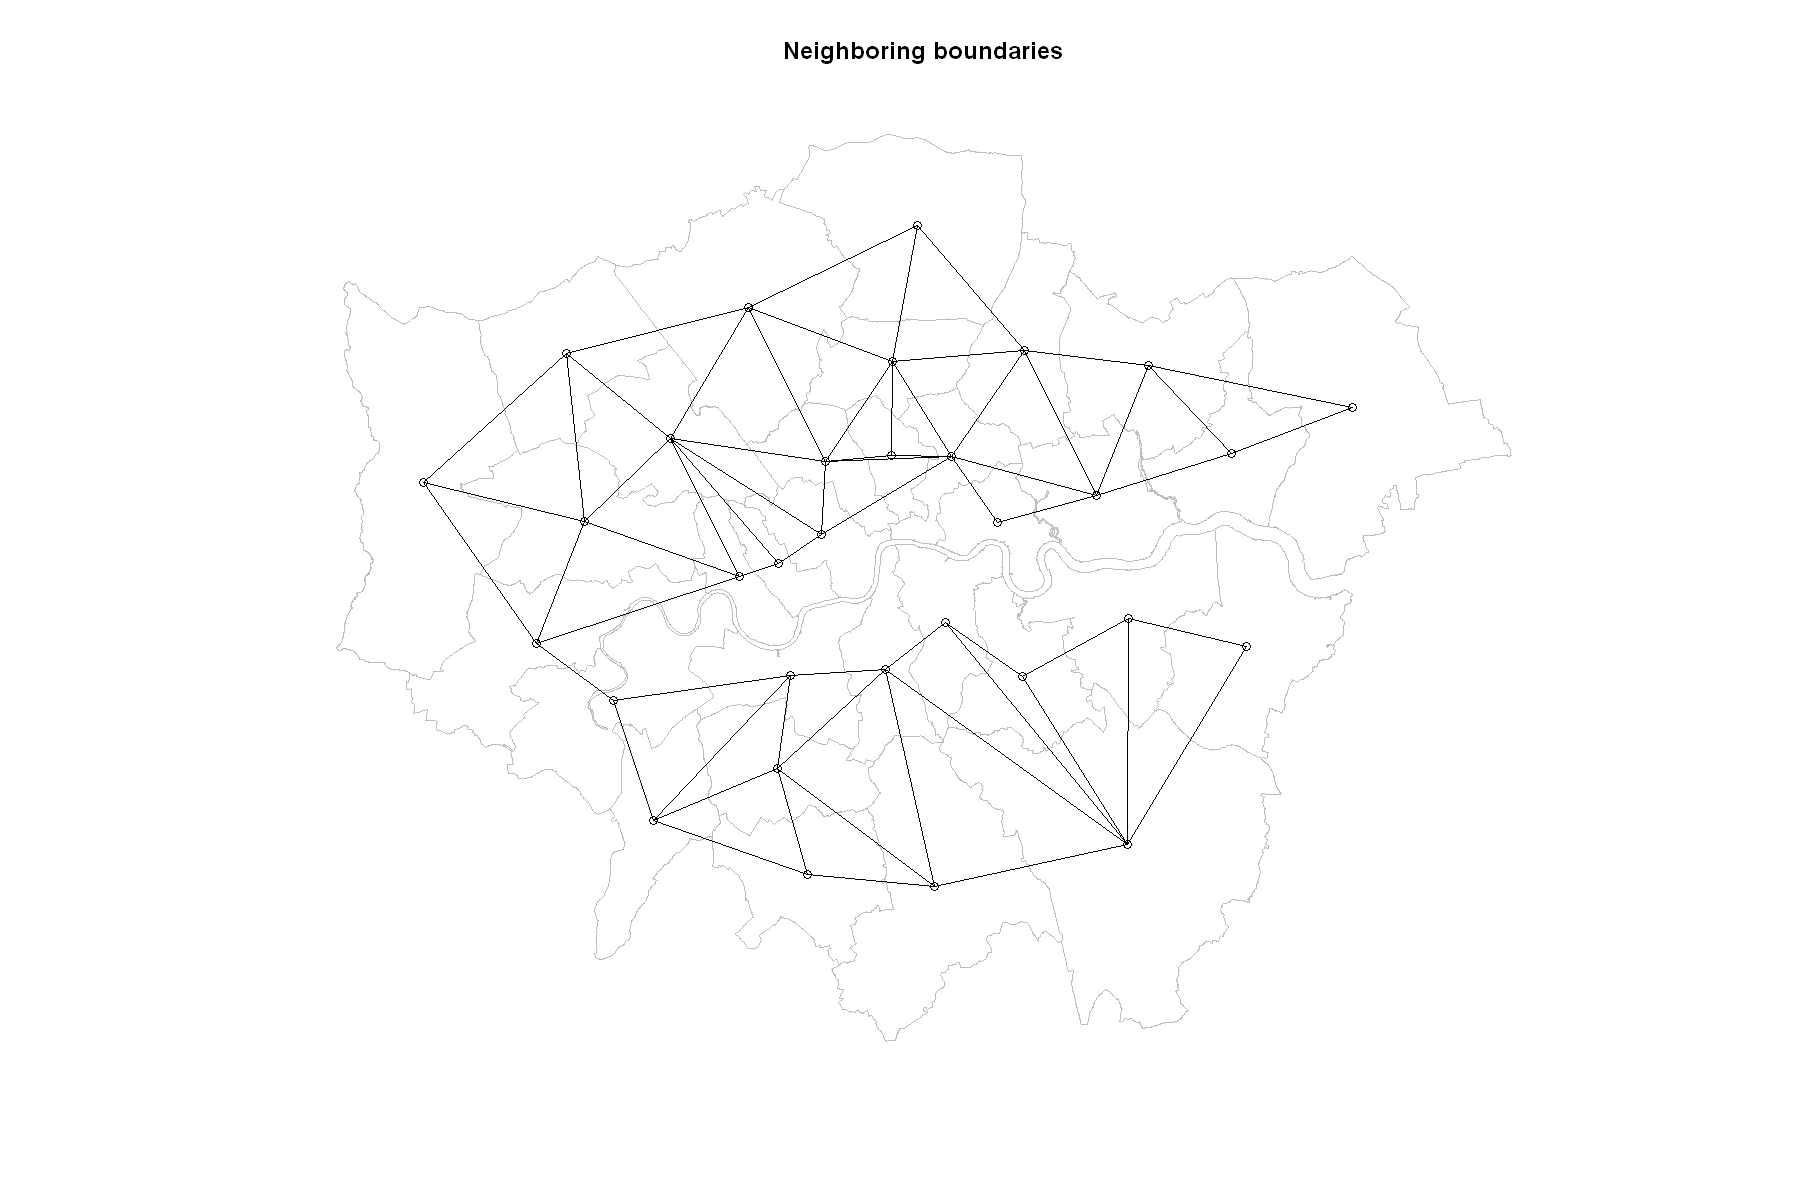

In [22]:
###################################################
####### spatial autocorrelation
###################################################
#Bbuild the neighborhood structure and use the Moran test to check for spatial autocorrelation.

boroughnb=poly2nb(london)
plot(londonref, border="grey", main="Neighboring boundaries")
plot(boroughnb, coordinates(londonref), add=TRUE)

#Assign weights to the neighbors
bnb2listw=nb2listw(boroughnb) 

# replace NA with  the median value
london$new_cases[is.na(london$new_cases)] <- median(london$new_cases, na.rm=T) 




In [23]:
#Performing a hypothesis test
# check for spatial autocorrelation
moran_test=moran.mc(london$covidratio,listw=bnb2listw,nsim=99)
moran_test


	Monte-Carlo simulation of Moran I

data:  london$covidratio 
weights: bnb2listw  
number of simulations + 1: 100 

statistic = 0.61163, observed rank = 100, p-value = 0.01
alternative hypothesis: greater


* Note the boundary network of neighboring boroughs is naturally interrupted by the river boundary in the eastern part of our study area. This may probably not influence the result of our analysis.

* Overall, the analysis shows that there is a statistically significant positive spatial autocorrelation (positive clustering or pattern) in the standardize incidence ratio variable for the London dataset. The small p-value (0.01) indicates that the observed spatial pattern is unlikely to have occurred by chance alone. The Moran's I statistic value (0.61163) close to 1 further confirms the presence of spatial clustering.

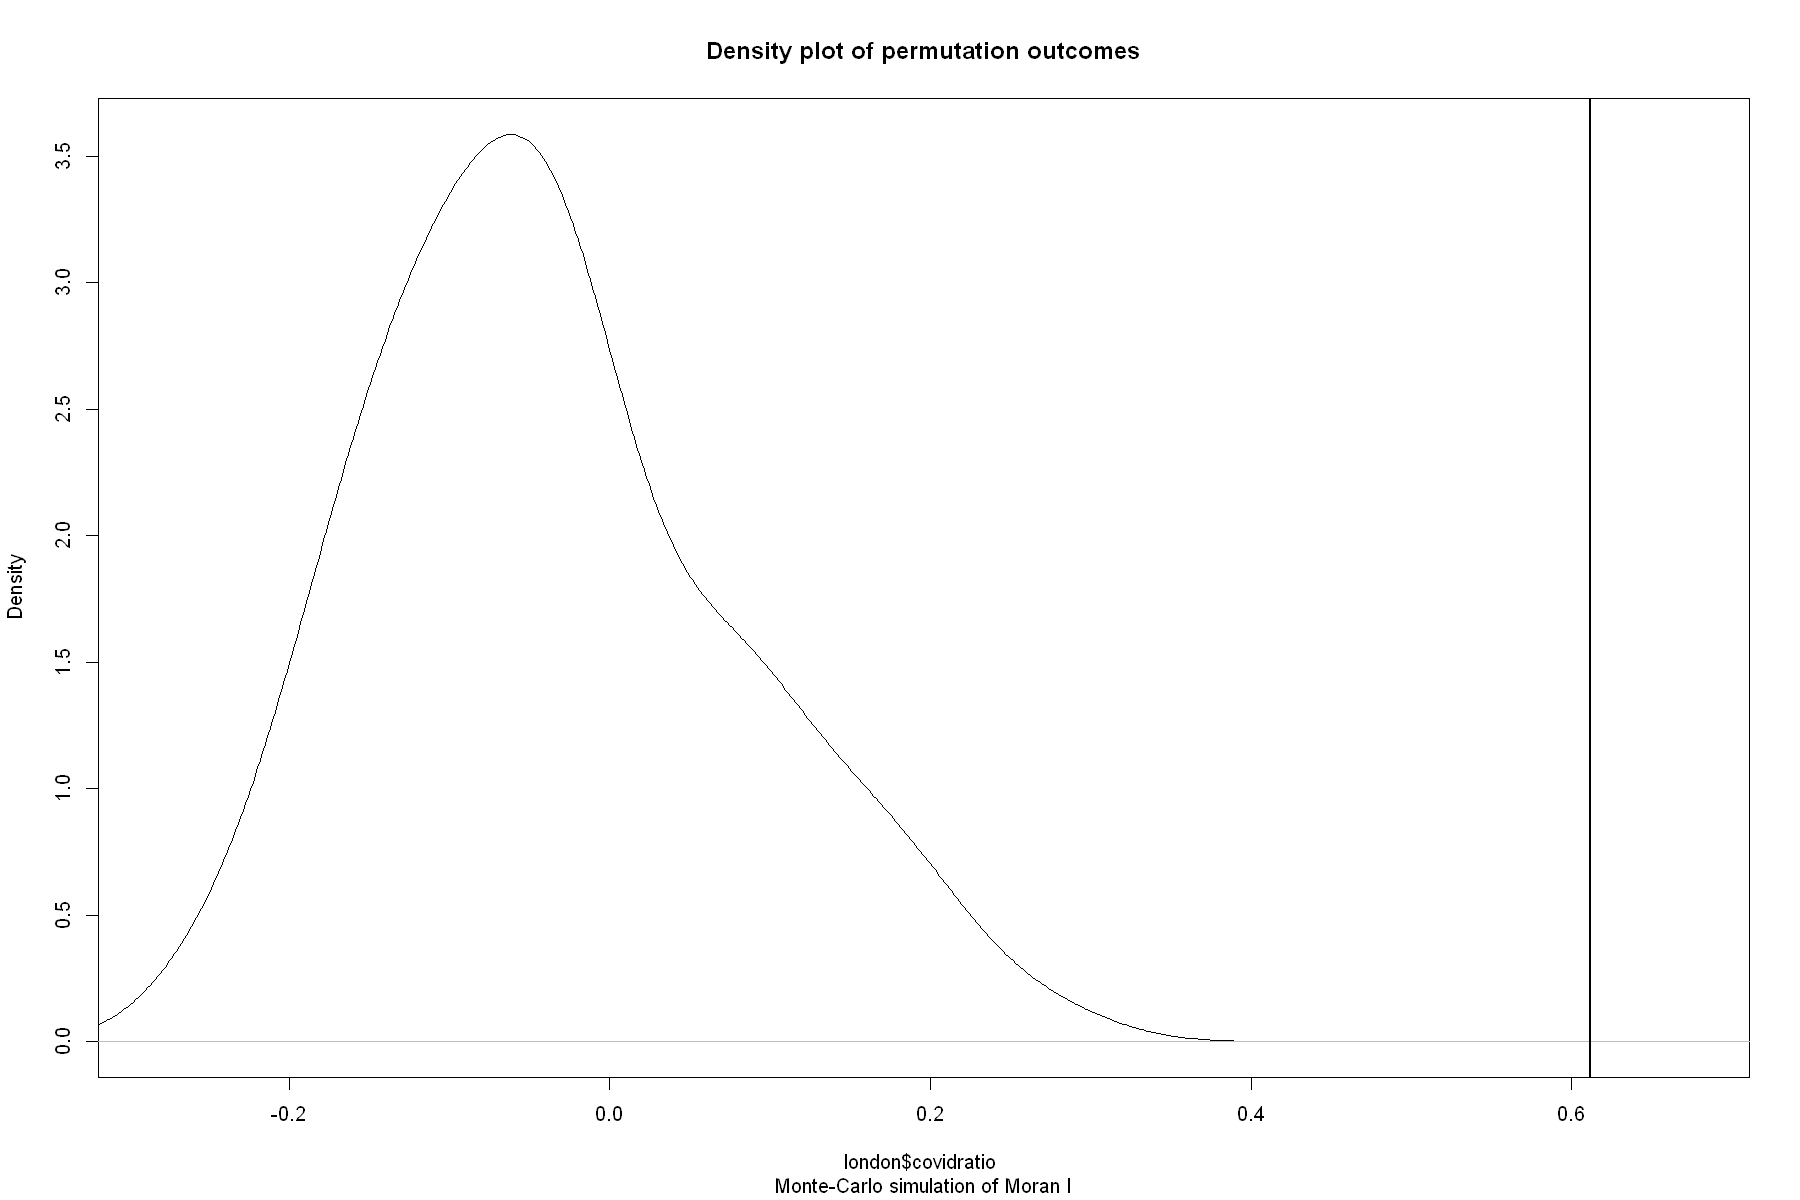

In [24]:
plot(moran_test)

# 5. Cartogram
 [Go back to the "Table of contents"](#Table-of-contents)

* The graph illustrates the hypothetical distribution of Moran I values that would arise if the SIR of cases were randomly distributed among the boroughs. It is essential to observe that our actual statistic, 0.61163, is significantly skewed to the right of the distribution. This indicates that the variable are clustered together (positive Moran's I value implies clustering, while a negative value suggests dispersion).

[1] "Breaks at:"


[1] 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4

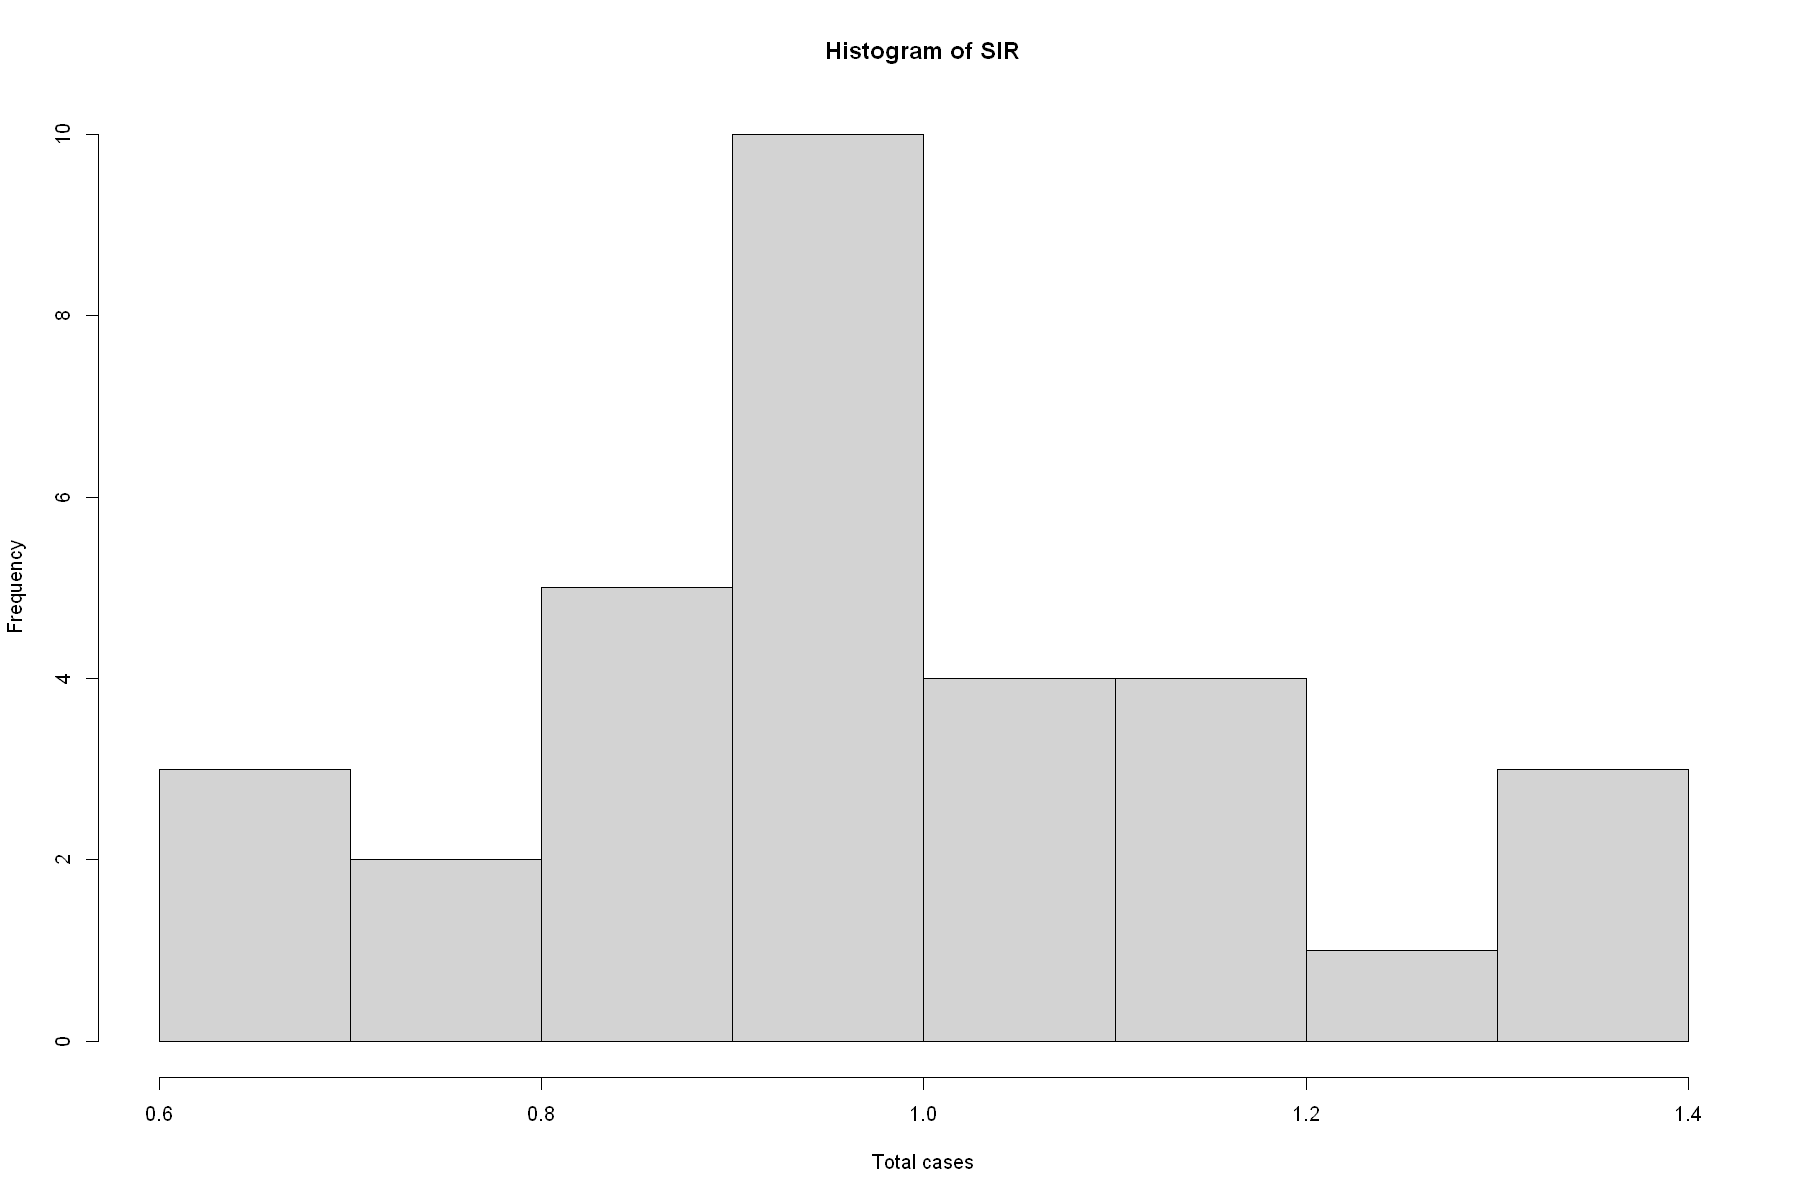

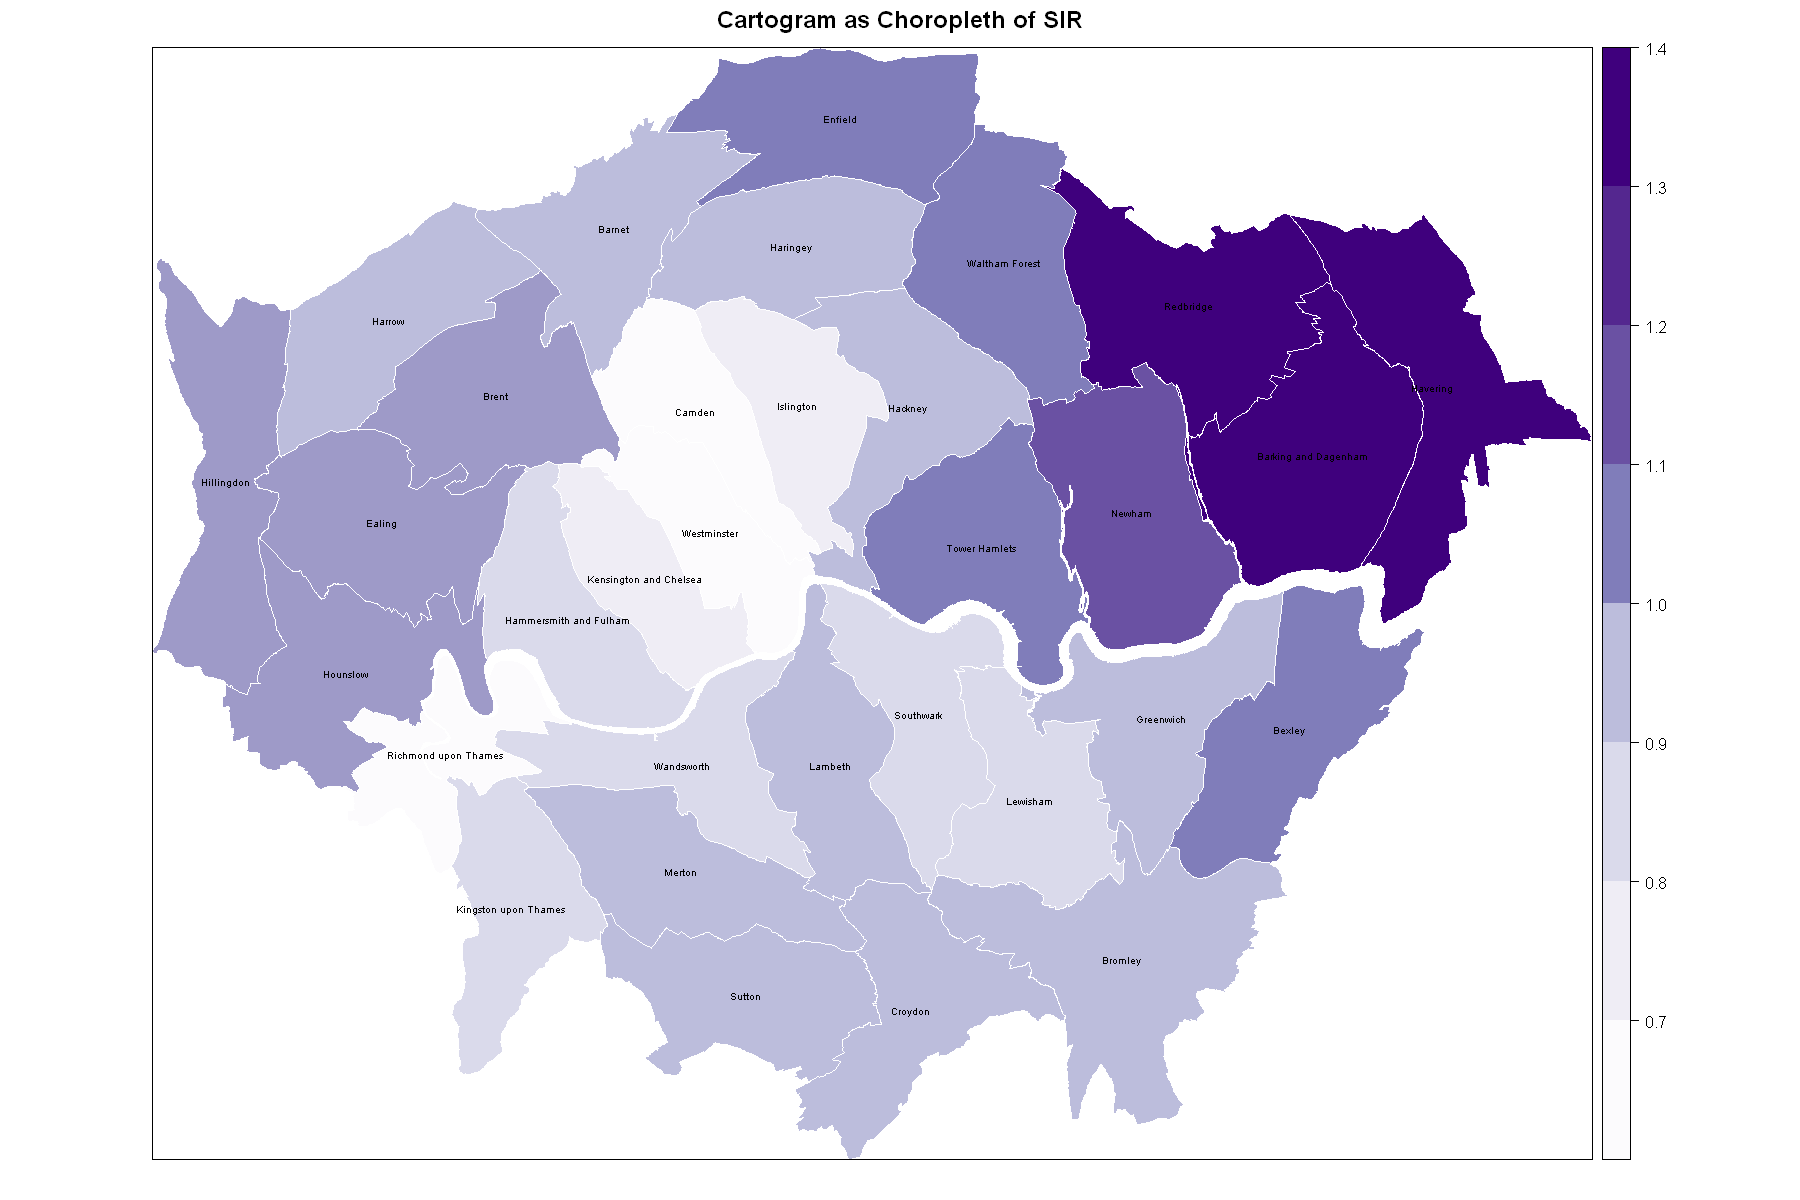

In [28]:
###################################################
#######Cartogram scaled to total cases
###################################################

cartoref<-cartogram_cont(london,"covidratio")
plot(cartoref)

# make it nicer
#range(london$covidratio)
#### use the histogram distribution breaks for  the color palette
hist(london$covidratio,freq = T,plot=T,main="Histogram of SIR",xlab="Total cases")### to check for the data distribution 
#str(hist(london$covidratio,plot= FALSE))
tmp=hist(london$covidratio,plot= FALSE)
print('Breaks at:')
tmp$breaks


my.palette <- brewer.pal(n = length(tmp$breaks), name = "Purples")

##Helper function for making labels for each entry
sp.label <- function(x, label) {list("sp.text", coordinates(x), label,cex=0.5)}
borderCol <- "white"

##Display it using sp plot
at=tmp$breaks
y <- spplot(cartoref, "covidratio", col.regions = my.palette, 
            # cuts = length(my.palette)-1, col = borderCol
            cuts = length(my.palette), col = borderCol,
            at = at,
            main="Cartogram as Choropleth of SIR",sp.layout=sp.label(cartoref, label=cartoref$NAME))
print (y)

* To enhance the visualization of the areal distribution of SIR values, a cartogram was employed. The cartogram employs a rubber sheet distortion algorithm, as described by Dougenik et al. (1985), to create continuous spatial representation. Here, the size of each borough is scaled proportionally to its corresponding SIR value. Boroughs with higher estimated SIR values appear more stretched on the cartogram compared to those with lower values. The color classification scheme used in the cartogram was based on the histogram distribution of the estimated SIR values.

# 5.1 Time series plot
 [Go back to the "Table of contents"](#Table-of-contents)

In [29]:
#read the full observed data without subsetting to the record of the most current date (16/02/2021) as previously done
covid <- read.csv("./data/phe_cases_london_boroughs.csv")
date <- unique(covid$date)

In [51]:
# cartogram timeseries total cases

#prepare the time series sequence
x <- date[1:length(date)]
bi_seq=seq(1,length(x),14)
bi_dates<- x[seq(1,length(x),14)]

#prepare an empty dataframe to store the biweekly sum by borough
duplicated_rows=duplicated(covid[,1:2])
code=tmp$area_code
# Drop duplicated rows
tmp <- covid[!duplicated_rows, ][,1:2]
empty=as.data.frame(matrix(NA,length(code),length(bi_seq)))
 colnames(empty)=bi_dates
 bi_weekly=cbind(tmp,empty)

#check the tmeplate for storing the bi weekly sum of new cases
head(bi_weekly)


X                    area_code 2_11_2020 2_25_2020 3_10_2020 3_24_2020
1 Barking and Dagenham E09000002 NA        NA        NA        NA       
2 Barnet               E09000003 NA        NA        NA        NA       
3 Bexley               E09000004 NA        NA        NA        NA       
4 Brent                E09000005 NA        NA        NA        NA       
5 Bromley              E09000006 NA        NA        NA        NA       
6 Camden               E09000007 NA        NA        NA        NA       
  4_7_2020 4_21_2020 5_5_2020 5_19_2020 ⋯ 10_6_2020 10_20_2020 11_3_2020
1 NA       NA        NA       NA        ⋯ NA        NA         NA       
2 NA       NA        NA       NA        ⋯ NA        NA         NA       
3 NA       NA        NA       NA        ⋯ NA        NA         NA       
4 NA       NA        NA       NA        ⋯ NA        NA         NA       
5 NA       NA        NA       NA        ⋯ NA        NA         NA       
6 NA       NA        NA       NA        ⋯ NA        NA         NA       
  11_17_2020 12_1_2020 12_15_2020 12_29_2020 1_12_2021 1_26_2021 2_9_2021
1 NA         NA        NA         NA         NA        NA        NA      
2 NA         NA        NA         NA         NA        NA        NA      
3 NA         NA        NA         NA         NA        NA        NA      
4 NA         NA        NA         NA         NA        NA        NA      
5 NA         NA        NA         NA         NA        NA        NA      
6 NA         NA        NA         NA         NA        NA        NA

In [52]:
## loop through the time steps ands compute the biweekly sum of new cases per borough
j=0
n=14
m=length(x)
for (i in code) {
  j=j+1
  bi_tmp=sapply(bi_seq, FUN=function(k){
    if((m-k)>n){
      tapply(covid$new_cases[covid$area_code==i][k:((k+n)-1)],covid$area_code[covid$area_code==i][k:((k+n)-1)],sum, na.rm=T)}
    else{tapply(covid$new_cases[covid$area_code==i][k:m],covid$area_code[covid$area_code==i][k:m],sum, na.rm=T)}
  })
  bi_weekly[j,3:29]=bi_tmp
}

In [ ]:
#make the  biweekly catogram and save  as .PNG files

biweekly_dir="./figure/cartogram_biweekly/"
londonref=londonref.reshape
londonref=londonref[,1:2]
londonref <- merge(x=londonref, y=bi_weekly, by.x="GSS_CODE", by.y="area_code")
# cartogram timeseries total_cases 
for (l in seq(bi_seq)) {
  # compute cartogram and print spplot 
  
  londonref_tmp=londonref[,l+3]
  tmp=hist(londonref_tmp@data[,1],plot= FALSE)#### use as breaks for coloring the cartogram
  at=tmp$breaks
  cartoref_bi<-cartogram_cont(londonref_tmp,as.character(bi_dates[l]))
  png(paste0(biweekly_dir,bi_dates[l],".png", sep=""))
  y=spplot(cartoref_bi,Z= as.character(bi_dates[l]), col.regions = my.palette, 
           cuts = length(my.palette), col = borderCol,
           at = at,sp.layout=sp.label(cartoref, label=cartoref$NAME),
           main=paste0("The biweekly sum of COVID-19 new cases in London: ",as.Date(bi_dates[l], format = "%m_%d_%Y"),sep=" "))
           #main=paste0("Cartogram + Choropleth of biweekly covid19 cases by ",bi_dates[l],sep=""))
  print(y)
  dev.off()
}


In [ ]:
## list file names and read in accoridng to increasing timesteps
cart_file = list.files(path =biweekly_dir ,pattern="*.png", full.names = TRUE)

#function to used to sorth the files
get_key_from_filename <- function(filename) {
  base_name=basename(filename)
  #without extension
  key <-sub("\\.\\w+$", "", base_name)
  key=as.Date(key, format = "%m_%d_%Y")
  return(key)
}
# Use order() with the key function to sort the filenames
sorted_files_indices <- order(sapply(cart_file, get_key_from_filename))
# Sort the filenames based on the sorted indices
sorted_file_names <- cart_file[sorted_files_indices]
# Print the sorted filenames
print(sorted_file_names)



In [ ]:
img_list <- lapply(sorted_file_names, image_read)

## join the images together
img_joined <- image_join(img_list)

## animate at 2 frames per second
img_animated <- image_animate(img_joined, fps = 0.5)

## view animated image
img_animated

## save to disk
image_write(image = img_animated, path = "./figure/gif/biweekly_animation.gif")
